In [3]:
# 📌 Step 1: Upload Dataset
from google.colab import files
uploaded = files.upload()


Saving coin_gecko_2022-03-17.csv to coin_gecko_2022-03-17 (1).csv
Saving coin_gecko_2022-03-16.csv to coin_gecko_2022-03-16 (1).csv


In [7]:
# 📌 Step 2: Load the CSV File
import pandas as pd


In [8]:
# Replace 'your_dataset.csv' with the uploaded file name
filename = next(iter(uploaded))  # Automatically picks the uploaded file
df = pd.read_csv(filename)


In [9]:
# 📌 Step 3: Quick Overview of Dataset
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df.head()

Shape of dataset: (500, 9)

Column names: ['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']

Missing values per column:
 coin          0
symbol        0
price         0
1h            4
24h           4
7d            5
24h_volume    4
mkt_cap       0
date          0
dtype: int64

Data types:
 coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [10]:
# 📌 Step 4: Basic EDA
import matplotlib.pyplot as plt
import seaborn as sns

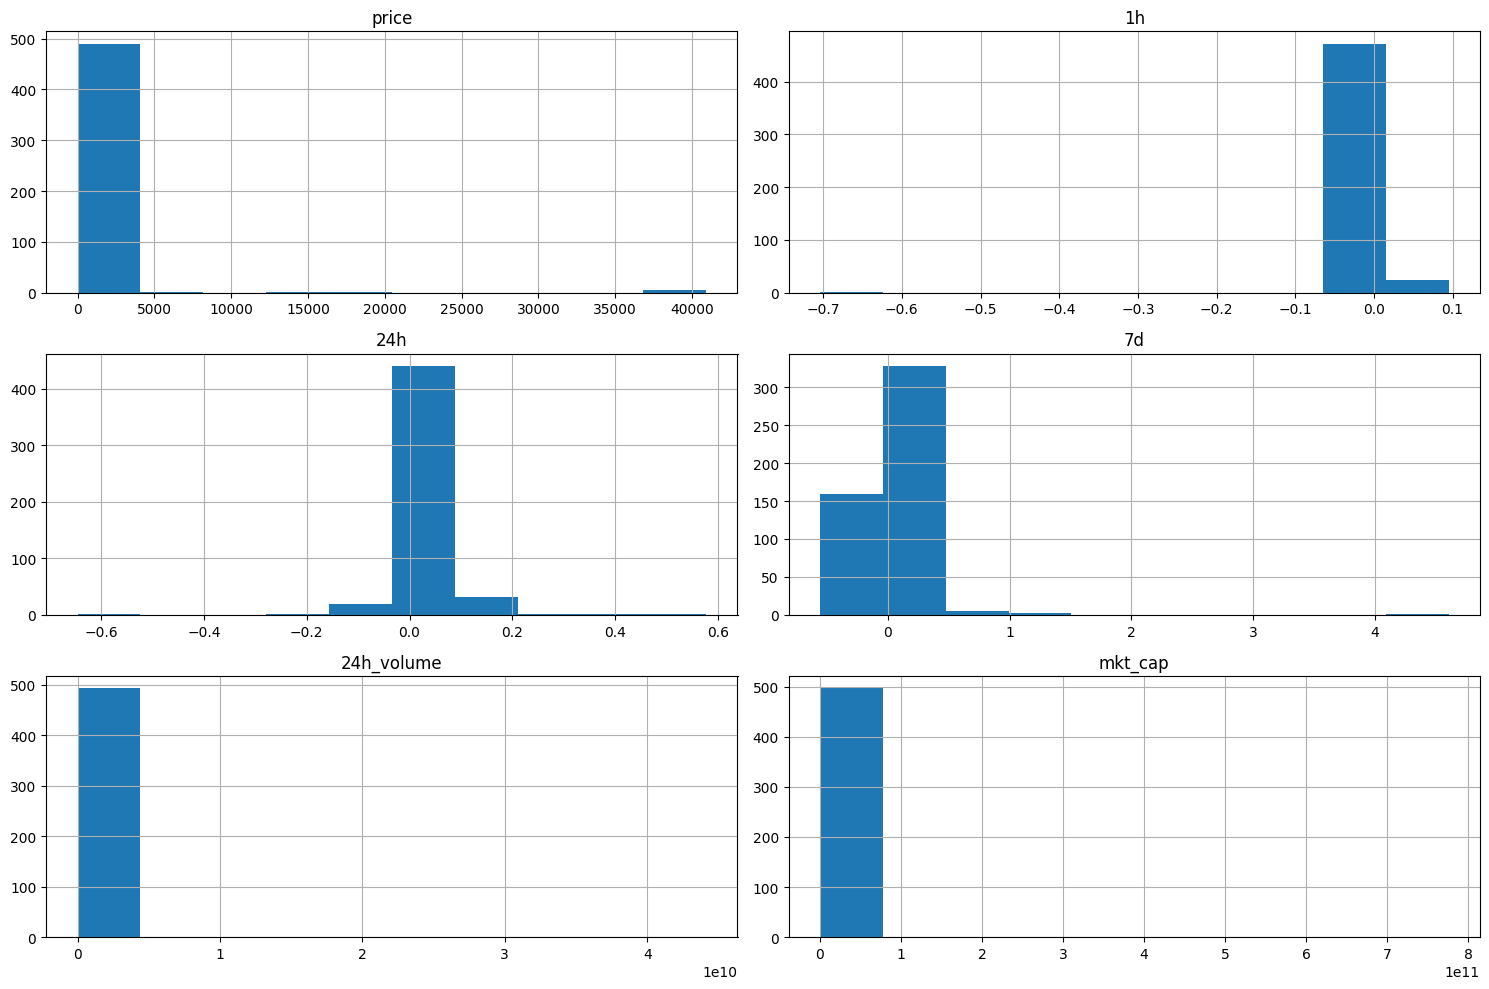

In [11]:
# Replace with actual columns in your dataset
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


In [12]:
# 📌 Step 5: Data Cleaning
# Fill or drop missing values
df = df.dropna()  # OR df.fillna(method='ffill')

In [13]:
# 📌 Step 6: Feature Scaling
from sklearn.preprocessing import StandardScaler

In [14]:

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)


In [15]:
# 📌 Step 7: Save Processed Data (Optional)
df_scaled.to_csv("processed_crypto_data.csv", index=False)
print("✅ Data Preprocessing Done! Ready for modeling.")

✅ Data Preprocessing Done! Ready for modeling.


In [29]:
# ✅ Set the correct target column
target_column = '24h_volume'

# ✅ Define features (exclude target column)
feature_columns = ['price', '1h', '24h', '7d', 'mkt_cap']  # exclude 'coin', 'symbol', 'date'
X = df[feature_columns]
y = df[target_column]

# ✅ Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_columns)

# ✅ Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Train Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\n📊 Model Evaluation:")
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("\n📊 Model Evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))




📊 Model Evaluation:
RMSE: 4265376168.399945

📊 Model Evaluation:
RMSE: 4265376168.399945
MAE: 603181132.5369513
R² Score: 0.22659392373493137


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("\n🌳 Random Forest Evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R² Score:", r2_score(y_test, rf_pred))



🌳 Random Forest Evaluation:
RMSE: 4308787025.796472
MAE: 627447182.179514
R² Score: 0.2107711356210915


In [31]:
import numpy as np
y_log = np.log1p(y)  # log(1 + x) to handle 0s

# Then re-train with y_log and inverse later with np.expm1()


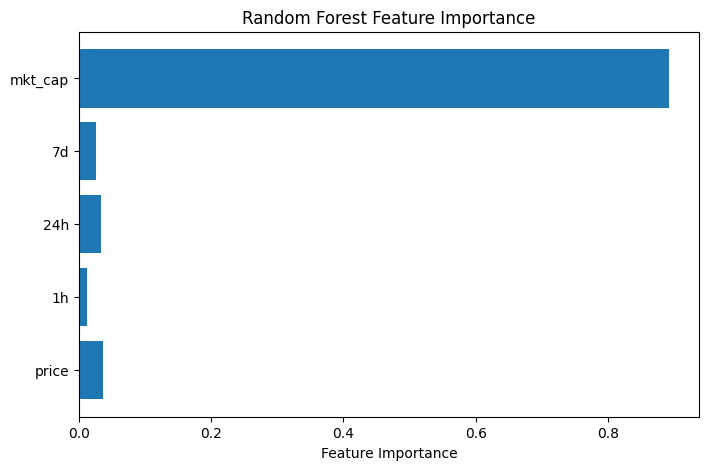

In [32]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [33]:
import numpy as np

# ✅ Log-transform the target variable
y_log = np.log1p(y)  # log(1 + y), safe for zeros

# ✅ Train-test split again using y_log
X_train, X_test, y_train_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# ✅ Train Random Forest again
from sklearn.ensemble import RandomForestRegressor
rf_model_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_log.fit(X_train, y_train_log)

# ✅ Predict on test set (log scale)
y_pred_log = rf_model_log.predict(X_test)

# ✅ Convert back from log scale to original volume scale
y_test_actual = np.expm1(y_test_log)
y_pred_actual = np.expm1(y_pred_log)

# ✅ Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\n🔁 Random Forest with Log-Transformed Target:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("R² Score:", r2_score(y_test_actual, y_pred_actual))



🔁 Random Forest with Log-Transformed Target:
RMSE: 4600308446.733735
MAE: 680969491.709062
R² Score: 0.1003640391771009


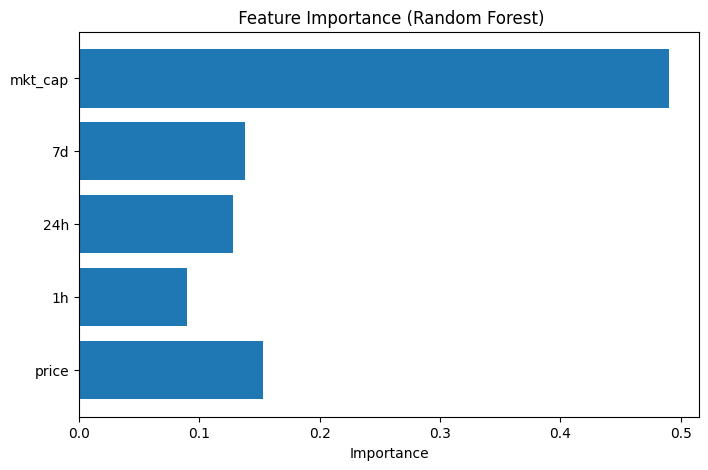

In [35]:
import matplotlib.pyplot as plt

importances = rf_model_log.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feat_names, importances)
plt.xlabel("Importance")
plt.title(" Feature Importance (Random Forest)")
plt.show()


In [36]:
# ✅ Use only strong features
feature_columns = ['price', '24h', 'mkt_cap']

# Recreate X and scale again
X = df[feature_columns]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_columns)

# Use previous log-transformed target
y_log = np.log1p(y)

# Train-test split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# Retrain model
from sklearn.ensemble import RandomForestRegressor
rf_model_refined = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_refined.fit(X_train, y_train_log)

# Predict and revert log scale
y_pred_log = rf_model_refined.predict(X_test)
y_test_actual = np.expm1(y_test_log)
y_pred_actual = np.expm1(y_pred_log)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("\n🎯 Refined Model After Removing Weak Features:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("R² Score:", r2_score(y_test_actual, y_pred_actual))



🎯 Refined Model After Removing Weak Features:
RMSE: 4551265731.141123
MAE: 676186887.4796959
R² Score: 0.119443373481531


In [38]:
import pickle

# Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model_refined, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
